<a href="https://colab.research.google.com/github/AssisV/portfolio-optimization-/blob/main/Otimizador_Carteira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalando bibliotecas

In [11]:
!pip install numpy pandas scipy yfinance matplotlib seaborn

# Importando bibliotecas

In [12]:
import numpy as np
import pandas as pd
from scipy.optimize import linprog
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

# Classe `PortfolioOptimizer`

In [28]:
class PortfolioOptimizer:
    def __init__(self, tickers, risk_limit):
        """
        Inicializa o otimizador de carteira com os ativos e limite de risco.

        :tickers: Lista de símbolos dos ativos.
        :risk_limit: Limite máximo de risco aceitável (capacidade da mochila).
        """
        self.tickers = tickers
        self.risk_limit = risk_limit
        self.returns = self.get_data()
        self.expected_returns = self.returns.mean() * 252  # Retorno anualizado
        self.risks = self.returns.std() * np.sqrt(252)      # Risco anualizado

    def get_data(self):
        """
        Coleta dados históricos dos ativos usando yfinance.

        :return: DataFrame com os retornos diários.
        """
        data = yf.download(self.tickers, start="2020-01-01", end="2024-01-01")['Adj Close']
        return data.pct_change().dropna()

    def optimize_portfolio(self):
        """
        Otimiza a carteira para maximizar o retorno esperado respeitando o limite de risco.

        :return: Pesos da carteira, retorno esperado e risco da carteira.
        """
        c = -self.expected_returns.values  # Coeficientes para maximizar o retorno
        A = [self.risks.values]            # Matriz de restrições (risco)
        b = [self.risk_limit]               # Limite de risco máximo

        bounds = [(0.05, 0.2) for _ in range(len(self.tickers))]

        # Resolvendo o problema de otimização
        result = linprog(c, A_ub=A, b_ub=b, bounds=bounds)

        if result.success:
            weights = result.x
            portfolio_return = -result.fun
            portfolio_risk = np.dot(weights, self.risks)
            return weights, portfolio_return, portfolio_risk
        else:
            raise ValueError("Otimização falhou!")

# Obter tickets

In [20]:
def get_all_tickers():
    """
    Obtém uma lista de tickers disponíveis na bolsa.

    :return: Lista de tickers.
    """
    return ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'NFLX', 'META', 'NVDA', 'AMD', 'DIS']

# Filtro dos tickets válidos

In [21]:
def filter_valid_tickers(all_tickers, risk_limit):
    """
    Filtra tickers válidos com base no limite de risco.

    :all_tickers: Lista completa de tickers.
    :risk_limit: Limite máximo de risco aceitável.
    :return: Lista filtrada de tickers válidos.
    """
    valid_tickers = []

    for ticker in all_tickers:
        try:
            data = yf.download(ticker, start="2020-01-01", end="2024-01-01")['Adj Close']
            returns = data.pct_change().dropna()
            risk = returns.std() * np.sqrt(252)  # Risco anualizado

            if risk <= risk_limit:
                valid_tickers.append(ticker)

        except Exception as e:
            print(f"Erro ao processar {ticker}: {e}")

    return valid_tickers

# Funções de Visualização

In [14]:
def plot_asset_allocation(weights, tickers):
    """
    Plota a alocação dos ativos na carteira.

    :weights: Pesos dos ativos na carteira.
    :tickers: Lista de símbolos dos ativos.
    """
    plt.figure(figsize=(10, 6))
    sns.barplot(x=tickers, y=weights)
    plt.title('Alocação de Ativos na Carteira')
    plt.ylabel('Peso')
    plt.xlabel('Ativos')
    plt.show()

def plot_efficient_frontier(returns_list, risks_list):
    """
    Plota a fronteira eficiente.

    :returns_list: Lista de retornos simulados.
    :risks_list: Lista de riscos simulados.
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(risks_list, returns_list, alpha=0.1)
    plt.title('Fronteira Eficiente')
    plt.xlabel('Risco (Volatilidade)')
    plt.ylabel('Retorno Esperado')
    plt.grid()
    plt.show()

def plot_performance_over_time(dates, returns):
    """
    Plota a evolução do retorno ao longo do tempo.

    :dates: Datas correspondentes aos retornos.
    :returns: Retornos acumulados ao longo do tempo.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(dates, returns)
    plt.title('Evolução do Retorno ao Longo do Tempo')
    plt.xlabel('Data')
    plt.ylabel('Retorno Acumulado')
    plt.grid()
    plt.show()

# Execução do Código

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AAPL: Risco calculado = 0.33568103680357114
MSFT: Risco calculado = 0.3261545272420629
GOOGL: Risco calculado = 0.335334318652668
AMZN: Risco calculado = 0.37687983971890054
TSLA: Risco calculado = 0.681043554179295
NFLX: Risco calculado = 0.48684724801122087


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


META: Risco calculado = 0.467801512409452
NVDA: Risco calculado = 0.5422845590203627
AMD: Risco calculado = 0.5355046106246752
DIS: Risco calculado = 0.35715049696487783
Tickers Válidos: ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'DIS']


[*********************100%***********************]  5 of 5 completed


Pesos da Carteira: [0.2  0.2  0.05 0.2  0.2 ]
Retorno Esperado da Carteira: 0.19682263416221746
Risco da Carteira: 0.2926674693316844


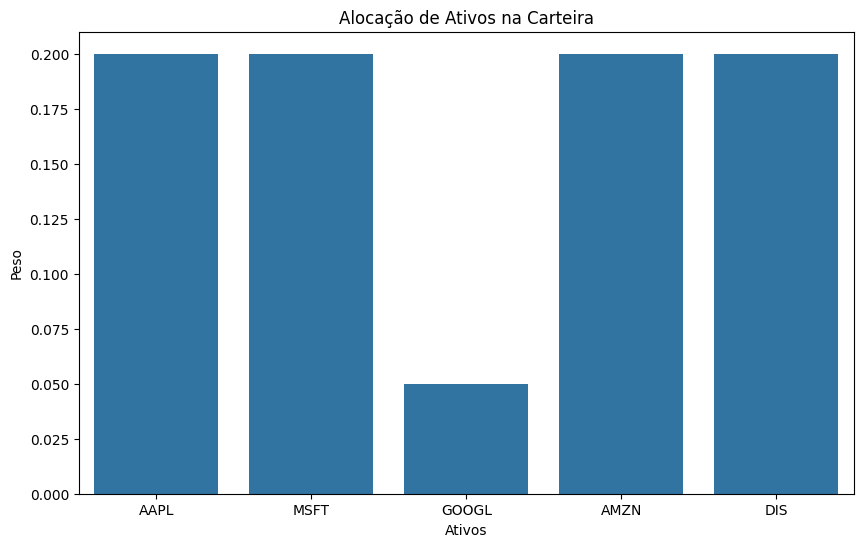

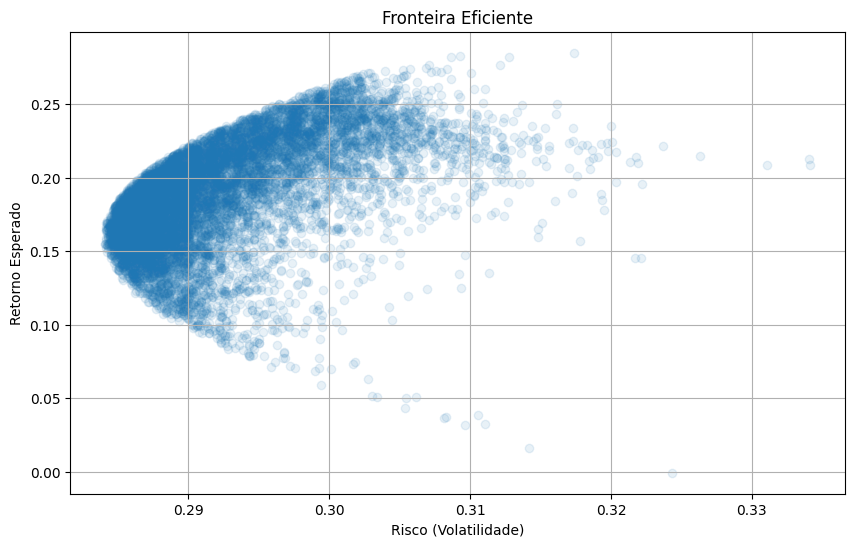

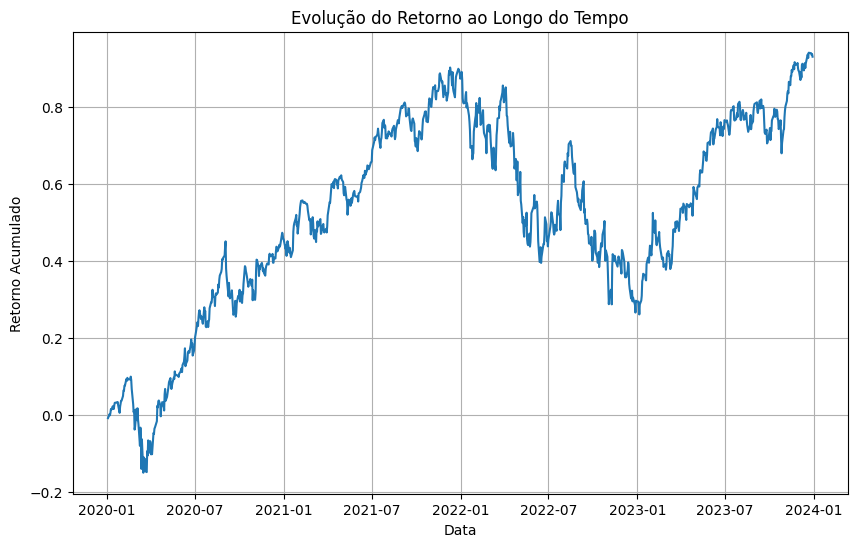

In [29]:
def main():
   all_tickers = get_all_tickers()  # Obtenha todos os tickers disponíveis

   risk_limit = 0.38  # Limite de risco 0.38

   # Filtra os tickers válidos com base no limite de risco
   valid_tickers = filter_valid_tickers(all_tickers, risk_limit)

   if not valid_tickers:
       print("Nenhum ticker válido encontrado dentro do limite de risco.")
       return

   print("Tickers Válidos:", valid_tickers)

   optimizer = PortfolioOptimizer(valid_tickers, risk_limit)

   # Otimização da carteira
   weights, portfolio_return, portfolio_risk = optimizer.optimize_portfolio()

   print("Pesos da Carteira:", weights)
   print("Retorno Esperado da Carteira:", portfolio_return)
   print("Risco da Carteira:", portfolio_risk)

   plot_asset_allocation(weights, valid_tickers)

   returns_list = []
   risks_list = []

   for _ in range(10000):
       random_weights = np.random.random(len(valid_tickers))
       random_weights /= np.sum(random_weights)

       simulated_return = np.dot(random_weights, optimizer.expected_returns)
       simulated_risk = np.sqrt(np.dot(random_weights.T,
                                         np.dot(optimizer.returns.cov() * 252,
                                                random_weights)))

       returns_list.append(simulated_return)
       risks_list.append(simulated_risk)

   plot_efficient_frontier(returns_list, risks_list)

   daily_returns = optimizer.returns.dot(weights)
   cumulative_returns = (1 + daily_returns).cumprod() - 1
   dates = cumulative_returns.index

   plot_performance_over_time(dates, cumulative_returns)

if __name__ == "__main__":
   main()